In [23]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

#### Question 1

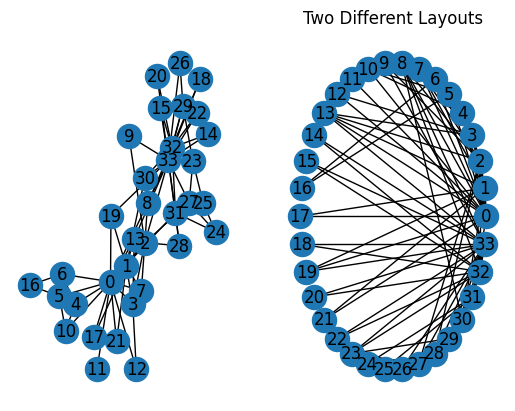

In [24]:
fig,ax = plt.subplots(1,2)
plt.title('Two Different Layouts')
G = nx.karate_club_graph()
pos = nx.spring_layout(G)
nx.draw(G,pos,with_labels=True,ax=ax[0])
pos = nx.circular_layout(G)
nx.draw(G,pos,with_labels=True,ax=ax[1])


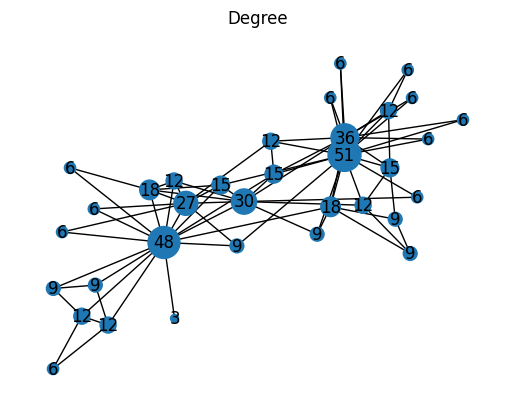

In [25]:
def Draw(network,layout,centrality_name,centrality_metric):
    G = network
    pos= layout
    title = centrality_name
    for i in centrality_metric.keys():
        centrality_metric[i] = int(centrality_metric[i]*100)
    size = [i*11 for i in centrality_metric.values()]
    plt.title(title)
    nx.draw(G,pos,with_labels=True,labels=centrality_metric,node_size=size)
    plt.show()


G = nx.karate_club_graph()
pos = nx.spring_layout(G)
centrality_name = "Degree"
centrality_value = nx.degree_centrality(G)
Draw(G,pos,centrality_name,centrality_value)    


In [26]:
class Centrality_type:
    def __init__(self,name,graph):
        self.name = name
        self.G = graph

    def degree_centrality(self):
        adjacency_matrix  = nx.adjacency_matrix(self.G).A
        num_edges = len(self.G.edges())
        degree_matrix = []
        for i in range(len(self.G.nodes())):
            degree = 0
            for j in range(len(adjacency_matrix[i])):
                if(adjacency_matrix[i][j]>=1):
                    degree = degree+1
            degree_matrix.append(degree)
        degree_matrix = [i/num_edges for i in degree_matrix]
        return degree_matrix

    def closeness_centrality(self):
        g_distance_dict = {(e1, e2): weight for e1, e2, weight in G.edges(data='weight')}
        nx.set_edge_attributes(G, g_distance_dict, 'distance')
        adjacency_matrix = nx.adjacency_matrix(self.G).A
        total_dist = []
        for i in range(len(self.G.nodes())):
            shortest_path_distance = []
            for j in range(len(self.G.nodes())):
                if(i==j):
                    continue
                source = j
                dest  = i
                path = nx.shortest_path(self.G,source,dest,weight='distance')
                #print(path)
                edge_list = []
                edge_list =[[path[i],path[i+1]] for i in range(len(path)-1) ]
                dist = 0
                for k in edge_list:
                    dist = dist + adjacency_matrix[k[0]][k[1]]
                shortest_path_distance.append(dist)
            total_dist.append(sum(shortest_path_distance))
        #total_dist.remove(0)
        total_dist = [(len(self.G.nodes())-1)/i for i in total_dist]
        return total_dist
    
    def betweeness_centrality(self):
        adjacency_matrix = nx.adjacency_matrix(self.G).A
        g_distance_dict = {(e1, e2): weight for e1, e2, weight in G.edges(data='weight')}
        nx.set_edge_attributes(G, g_distance_dict, 'distance')
        total_paths = []
        total_path_frac = []
        shortest_path_num = []
        shortest_path_frac = []
        for l in range(len(self.G.nodes())):
            for i in range(len(self.G.nodes())):
                for j in range(len(self.G.nodes())):
                    num = 0
                    num_paths = 0
                    if(i==l or j == l):
                        num = 0
                        source = i
                        dest  = j
                        paths = [p for p in nx.all_shortest_paths(self.G,source,dest,weight='distance')]
                        num_paths = len(paths)
                    elif(i==j):
                        source = i
                        dest  = j
                        paths = [p for p in nx.all_shortest_paths(self.G,source,dest,weight='distance')]
                        for m in paths:
                            if(l in m):
                                num = num + 1
                        num_paths = 1
                    else:
                        source = i
                        dest  = j
                        paths = [p for p in nx.all_shortest_paths(self.G,source,dest,weight='distance')]
                        num_paths = len(paths)
                        for k in paths:
                            if( l in k):
                                num = num + 1
                    shortest_path_num.append(num_paths)
                    shortest_path_frac.append(num)
            total_paths.append(sum(shortest_path_num))
            total_path_frac.append(sum(shortest_path_frac))
            shortest_path_num = []
            shortest_path_frac = []
        #total_dist.remove(0)
        ratio_nodes = [total_path_frac[i]/total_paths[i] for i in range(len(total_paths))]
        #n = len(self.G.nodes())
        #ratio_nodes = [(2*i)/((n-1)*(n-2)) for i in ratio_nodes]
        #print(ratio_nodes)
        return ratio_nodes
        
    def calculate_centrality(self):
        centrality_metric = []
        if(self.name == "closeness"):
            centrality_metric = self.closeness_centrality()
        if(self.name == "betweeness"):
            centrality_metric = self.betweeness_centrality()
        if(self.name == "degree"):
            centrality_metric = self.degree_centrality()
        return centrality_metric
    
    def compare_centrality(self):
        fig,ax = plt.subplots(1,3)

        degree_centrality = self.degree_centrality()
        closeness_centrality = self.closeness_centrality()
        betweeness_centrality = self.betweeness_centrality()

        g_distance_dict = {(e1, e2): weight for e1, e2, weight in G.edges(data='weight')}
        nx.set_edge_attributes(G, g_distance_dict, 'distance')

        actual_degree_centrality = list(nx.degree_centrality(self.G).values())
        actual_closeness_centrality = list(nx.closeness_centrality(self.G,wf_improved=False,distance='distance').values())
        actual_betweeness_centrality =list(nx.betweenness_centrality(self.G,weight='distance').values())

        ax[0].scatter(degree_centrality, actual_degree_centrality)
        ax[1].scatter(closeness_centrality, actual_closeness_centrality)
        ax[2].scatter(betweeness_centrality, actual_betweeness_centrality)
        ax[0].set_title("Degree Centrality")
        ax[1].set_title("Closeness Centrality")
        ax[2].set_title("Betweeness Centrality")
        plt.show()



        

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\sparse\_base.py:752: VisibleDeprecationWarning: Please use `.todense()` instead
  warn(np.VisibleDeprecationWarning(


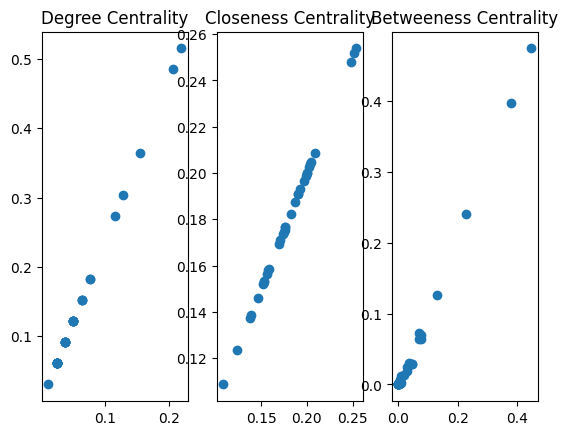

In [27]:
G = nx.karate_club_graph()
C = Centrality_type("closeness",G)
C.compare_centrality()

In [49]:
import matplotlib as mpl
def color_nodes(G,centrality_value):
    G = nx.Graph.to_directed(G)
    pos = nx.spring_layout(G)
    node_colors = centrality_value
    nodes = nx.draw_networkx_nodes(G,pos,node_color = node_colors,cmap = plt.cm.plasma)
    edges = nx.draw_networkx_edges(G,pos)
    sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma)
    plt.colorbar(sm)
    plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_2672\3376101987.py:9: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


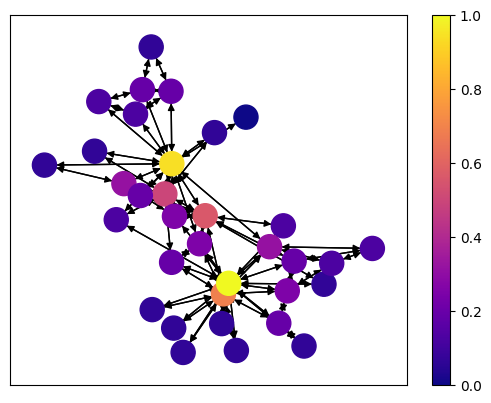

In [50]:
G = nx.karate_club_graph()
g_distance_dict = {(e1, e2): weight for e1, e2, weight in G.edges(data='weight')}
nx.set_edge_attributes(G, g_distance_dict, 'distance')
degree_centrality = list(nx.degree_centrality(G).values())
color_nodes(G, degree_centrality)